Contents

01. Importing Libraries
02. Importing Data Sets
03. Data Security Implications
04. Regional Segmentation
05. Creating An Exclusion Flag for Customer Activity
06. Creating Groupings for Customer Income
07. Creating Groupings for Customer Age
08. Creating Groupings for Dependants
09. Adding Deparment Names To Dataframe
10. Creating Customer Profiles
11. Visualizing Distribution of Customer Profiles
12. Creating Aggregations
13. Comparing Customer Profiles w/ Regions & Departments
14. Extra Visualizations
15. Ordering Habits Based On Customer Loyalty
16. Ordering Habits Based On Customer Region
17. Ordering Habits Based On Age & Family Status

# 01. Importing Libraries

In [1]:
# Import Libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# 02. Importing Data Sets

In [2]:
# Set path

path = r'/Users/danioprea/Desktop/Data Analytics/06-2023 Instacart Basket Analysis'

In [3]:
# Import orders_products_all.pkl

ords_prods_all = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_all.pkl'))

In [3]:
# Display max rows and columns

pd.options.display.max_rows = None
pd.options.display.max_columns = None

In [5]:
# Check the data

ords_prods_all.head()

,user_id,First Name,Surname,Gender,STATE,Age,date_joined,num_of_dependants,fam_status,income,product_id,product_name,aisle_id,department_id,prices,order_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_spending,spending_flag,median_days,order_frequency_flag
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,77,7,9.0,2543867,prior,5,1,9,30.0,2,0,Mid-range product,Regularly busy,Busiest days,Average orders,8,New customer,7.988889,Low spender,19.0,Regular customer
1,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,77,7,9.0,1285508,prior,7,5,15,11.0,1,1,Mid-range product,Regularly busy,Regularly busy,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer
2,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,77,7,9.0,2578584,prior,8,1,15,10.0,2,1,Mid-range product,Regularly busy,Busiest days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer
3,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,6184,Clementines,32,4,4.3,518967,prior,1,2,9,NaN,1,0,Low-range product,Regularly busy,Regularly busy,Average orders,8,New customer,7.988889,Low spender,19.0,Regular customer
4,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,6184,Clementines,32,4,4.3,2524893,prior,3,3,11,30.0,2,1,Low-range product,Regularly busy,Least busy days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer


In [6]:
ords_prods_all.shape

(32404859, 33)

# 03. Data Security Implications

Our data consists names of customers. To ensure our data GDPR requirements, we will drop these columns from the dataframe.

In [10]:
# Dropping the First Name column

ords_prods_all_1 = ords_prods_all.drop(columns = ['First Name'])

In [12]:
# Dropping the Surname columns

ords_prods_all_1 = ords_prods_all_1.drop(columns = ['Surname'])

In [13]:
# Check the new dataframe

ords_prods_all_1.head()

,user_id,Gender,STATE,Age,date_joined,num_of_dependants,fam_status,income,product_id,product_name,aisle_id,department_id,prices,order_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_spending,spending_flag,median_days,order_frequency_flag
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,77,7,9.0,2543867,prior,5,1,9,30.0,2,0,Mid-range product,Regularly busy,Busiest days,Average orders,8,New customer,7.988889,Low spender,19.0,Regular customer
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,77,7,9.0,1285508,prior,7,5,15,11.0,1,1,Mid-range product,Regularly busy,Regularly busy,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,77,7,9.0,2578584,prior,8,1,15,10.0,2,1,Mid-range product,Regularly busy,Busiest days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer
3,26711,Female,Missouri,48,1/1/2017,3,married,165665,6184,Clementines,32,4,4.3,518967,prior,1,2,9,NaN,1,0,Low-range product,Regularly busy,Regularly busy,Average orders,8,New customer,7.988889,Low spender,19.0,Regular customer
4,26711,Female,Missouri,48,1/1/2017,3,married,165665,6184,Clementines,32,4,4.3,2524893,prior,3,3,11,30.0,2,1,Low-range product,Regularly busy,Least busy days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer


# 04. Regional Segmentation & Analysis

In [35]:
# We're going to use states to create a new region column. We will do this with the loc() function
# First, we will do the Midwest states

ords_prods_all_1.loc[ords_prods_all_1['STATE'].str.contains('Wisconsin|Michigan|Illinois|Indiana|Ohio|North Dakota|South Dakota|Nebraska|Kansas|Minnesota|Iowa|Missouri'), 'Region'] = 'Midwest'

In [38]:
# Flag the West states

ords_prods_all_1.loc[ords_prods_all_1['STATE'].str.contains('Idaho|Montana|Wyoming|Nevada|Utah|Colorado|Arizona|New Mexico|Alaska|Washington|Oregon|California|Hawaii'), 'Region'] = 'West'

In [40]:
# Flag the Northeast states

ords_prods_all_1.loc[ords_prods_all_1['STATE'].str.contains('Maine|New Hampshire|Vermont|Massachusetts|Rhode Island|Connecticut|New York|Pennsylvania|New Jersey'), 'Region'] = 'Northeast'

In [45]:
# Flag the South states

ords_prods_all_1.loc[ords_prods_all_1['STATE'].str.contains('Delaware|Maryland|District of Columbia|Virginia|West Virginia|North Carolina|South Carolina|Georgia|Florida|Kentucky|Tennessee|Mississippi|Alabama|Oklahoma|Texas|Arkansas|Louisiana'), 'Region'] = 'South'

In [47]:
# Check the dataframe

ords_prods_all_1.head(100)

,user_id,Gender,STATE,Age,date_joined,num_of_dependants,fam_status,income,product_id,product_name,aisle_id,department_id,prices,order_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_spending,spending_flag,median_days,order_frequency_flag,Region
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,77,7,9.0,2543867,prior,5,1,9,30.0,2,0,Mid-range product,Regularly busy,Busiest days,Average orders,8,New customer,7.988889,Low spender,19.0,Regular customer,Midwest
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,77,7,9.0,1285508,prior,7,5,15,11.0,1,1,Mid-range product,Regularly busy,Regularly busy,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,Midwest
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,77,7,9.0,2578584,prior,8,1,15,10.0,2,1,Mid-range product,Regularly busy,Busiest days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,Midwest
3,26711,Female,Missouri,48,1/1/2017,3,married,165665,6184,Clementines,32,4,4.3,518967,prior,1,2,9,NaN,1,0,Low-range product,Regularly busy,Regularly busy,Average orders,8,New customer,7.988889,Low spender,19.0,Regular customer,Midwest
4,26711,Female,Missouri,48,1/1/2017,3,married,165665,6184,Clementines,32,4,4.3,2524893,prior,3,3,11,30.0,2,1,Low-range product,Regularly busy,Least busy days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,Midwest
5,26711,Female,Missouri,48,1/1/2017,3,married,165665,6184,Clementines,32,4,4.3,2984525,prior,4,1,17,19.0,2,1,Low-range product,Regularly busy,Busiest days,Average orders,8,New customer,7.988889,Low spender,19.0,Regular customer,Midwest
6,26711,Female,Missouri,48,1/1/2017,3,married,165665,6184,Clementines,32,4,4.3,2543867,prior,5,1,9,30.0,1,1,Low-range product,Regularly busy,Busiest days,Average orders,8,New customer,7.988889,Low spender,19.0,Regular customer,Midwest
7,26711,Female,Missouri,48,1/1/2017,3,married,165665,6184,Clementines,32,4,4.3,2505178,prior,6,1,8,21.0,1,1,Low-range product,Regularly busy,Busiest days,Average orders,8,New customer,7.988889,Low spender,19.0,Regular customer,Midwest
8,26711,Female,Missouri,48,1/1/2017,3,married,165665,6184,Clementines,32,4,4.3,1285508,prior,7,5,15,11.0,2,1,Low-range product,Regularly busy,Regularly busy,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,Midwest
9,26711,Female,Missouri,48,1/1/2017,3,married,165665,6184,Clementines,32,4,4.3,2578584,prior,8,1,15,10.0,3,1,Low-range product,Regularly busy,Busiest days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,Midwest


In [46]:
# Check the frequency of the Region column

ords_prods_all_1['Region'].value_counts(dropna = False)

South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: Region, dtype: int64

In [48]:
# Now we'll analyze spending habits by region with a crosstab

crosstab = pd.crosstab(ords_prods_all_1['Region'], ords_prods_all_1['spending_flag'], dropna = False)

In [49]:
crosstab.to_clipboard()

Upon analyzing the results of the crosstab, it is clear that there are more low spenders than high spenders across all the regions. With that being said, the south has the largest amount of low spenders at over 10 million low spenders. Ironically, the south also has the largest amount of high spenders out of all the regions at just over 200,000. The northeast has the smallest amount of low spenders at just over 5 million and the smallest amount of high spenders at just over 100,000.

# 05. Creating An Exclusion Flag for Customer Activity

In [52]:
# We want to remove all users with less than 5 orders. To do so, we will create an exclusion flag using the max_order
# column.

ords_prods_all_1.loc[ords_prods_all_1['max_order'] >= 5, 'exclusion_flag'] = 'High activity customer'

In [53]:
ords_prods_all_1.loc[ords_prods_all_1['max_order'] < 5, 'exclusion_flag'] = 'Low activity customer'

In [54]:
# Check the frequency results of our exclusion flag

ords_prods_all_1['exclusion_flag'].value_counts(dropna = False)

High activity customer    30964564
Low activity customer      1440295
Name: exclusion_flag, dtype: int64

In [56]:
# Create a dataframe of the low activity customers

df_low = ords_prods_all_1[ords_prods_all_1['exclusion_flag'] == 'Low activity customer']

In [57]:
# Check that we have the right amount of rows in our low activity dataframe

df_low.shape

(1440295, 33)

In [58]:
# Double-check the dataframe

df_low.head(30)

,user_id,Gender,STATE,Age,date_joined,num_of_dependants,fam_status,income,product_id,product_name,aisle_id,department_id,prices,order_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_spending,spending_flag,median_days,order_frequency_flag,Region,exclusion_flag
729,168851,Male,South Carolina,30,1/1/2017,0,single,63712,102,Danish Butter Cookies,61,19,5.5,1903574,prior,1,2,8,NaN,1,0,Mid-range product,Regularly busy,Regularly busy,Average orders,3,New customer,7.485714,Low spender,20.5,Non-frequent customer,South,Low activity customer
730,168851,Male,South Carolina,30,1/1/2017,0,single,63712,130,Vanilla Milk Chocolate Almond Ice Cream Bars M...,37,1,8.2,1903574,prior,1,2,8,NaN,3,0,Mid-range product,Regularly busy,Regularly busy,Average orders,3,New customer,7.485714,Low spender,20.5,Non-frequent customer,South,Low activity customer
731,168851,Male,South Carolina,30,1/1/2017,0,single,63712,130,Vanilla Milk Chocolate Almond Ice Cream Bars M...,37,1,8.2,1193140,prior,2,3,14,15.0,2,1,Mid-range product,Regularly busy,Least busy days,Most orders,3,New customer,7.485714,Low spender,20.5,Non-frequent customer,South,Low activity customer
732,168851,Male,South Carolina,30,1/1/2017,0,single,63712,130,Vanilla Milk Chocolate Almond Ice Cream Bars M...,37,1,8.2,1870356,prior,3,1,8,26.0,1,1,Mid-range product,Regularly busy,Busiest days,Average orders,3,New customer,7.485714,Low spender,20.5,Non-frequent customer,South,Low activity customer
733,168851,Male,South Carolina,30,1/1/2017,0,single,63712,196,Soda,77,7,9.0,1903574,prior,1,2,8,NaN,2,0,Mid-range product,Regularly busy,Regularly busy,Average orders,3,New customer,7.485714,Low spender,20.5,Non-frequent customer,South,Low activity customer
734,168851,Male,South Carolina,30,1/1/2017,0,single,63712,196,Soda,77,7,9.0,1193140,prior,2,3,14,15.0,1,1,Mid-range product,Regularly busy,Least busy days,Most orders,3,New customer,7.485714,Low spender,20.5,Non-frequent customer,South,Low activity customer
735,168851,Male,South Carolina,30,1/1/2017,0,single,63712,6184,Clementines,32,4,4.3,1870356,prior,3,1,8,26.0,2,0,Low-range product,Regularly busy,Busiest days,Average orders,3,New customer,7.485714,Low spender,20.5,Non-frequent customer,South,Low activity customer
1479,51,Female,Wyoming,37,1/1/2017,1,married,71190,445,Almond Honey Protein+ Bar,3,19,6.7,1099991,prior,1,3,14,NaN,7,0,Mid-range product,Regularly busy,Least busy days,Most orders,3,New customer,8.693103,Low spender,17.0,Regular customer,West,Low activity customer
1480,51,Female,Wyoming,37,1/1/2017,1,married,71190,5463,Original Oat Bar,3,19,2.9,1099991,prior,1,3,14,NaN,9,0,Low-range product,Regularly busy,Least busy days,Most orders,3,New customer,8.693103,Low spender,17.0,Regular customer,West,Low activity customer
1481,51,Female,Wyoming,37,1/1/2017,1,married,71190,10017,Tilapia Filet,39,12,18.2,1099991,prior,1,3,14,NaN,1,0,High-range product,Regularly busy,Least busy days,Most orders,3,New customer,8.693103,Low spender,17.0,Regular customer,West,Low activity customer


In [59]:
# Export this dataframe

df_low.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'low_activity_customers.pkl'))

In [60]:
# Remove the low activity customers from the main dataframe

ords_prods_all_2 = ords_prods_all_1[ords_prods_all_1['exclusion_flag'] == 'High activity customer']

In [61]:
# Check that we have the right amount of rows in our high activity dataframe

ords_prods_all_2.shape

(30964564, 33)

# 06. Creating Groupings for Customer Income

In [21]:
# We want to group customers by income. We will create a low income, middle income, and upper income flag based on
# income. First, we create the low income group.

ords_prods_all_2.loc[ords_prods_all_2['income'] <= 52000, 'income_group'] = 'Low Income'

In [22]:
# Next, we create the middle income group

ords_prods_all_2.loc[(ords_prods_all_2['income'] > 52000) & (ords_prods_all_2['income'] <= 150000), 'income_group'] = 'Middle Income'

In [23]:
#Lastly, we create the upper income group

ords_prods_all_2.loc[ords_prods_all_2['income'] > 150000, 'income_group'] = 'Upper Income'

In [24]:
ords_prods_all_2.head()

,user_id,Gender,STATE,Age,date_joined,num_of_dependants,fam_status,income,product_id,product_name,aisle_id,department_id,prices,order_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_spending,spending_flag,median_days,order_frequency_flag,Region,exclusion_flag,income_group
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,77,7,9.0,2543867,prior,5,1,9,30.0,2,0,Mid-range product,Regularly busy,Busiest days,Average orders,8,New customer,7.988889,Low spender,19.0,Regular customer,Midwest,High activity customer,Upper Income
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,77,7,9.0,1285508,prior,7,5,15,11.0,1,1,Mid-range product,Regularly busy,Regularly busy,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,Midwest,High activity customer,Upper Income
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,77,7,9.0,2578584,prior,8,1,15,10.0,2,1,Mid-range product,Regularly busy,Busiest days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,Midwest,High activity customer,Upper Income
3,26711,Female,Missouri,48,1/1/2017,3,married,165665,6184,Clementines,32,4,4.3,518967,prior,1,2,9,NaN,1,0,Low-range product,Regularly busy,Regularly busy,Average orders,8,New customer,7.988889,Low spender,19.0,Regular customer,Midwest,High activity customer,Upper Income
4,26711,Female,Missouri,48,1/1/2017,3,married,165665,6184,Clementines,32,4,4.3,2524893,prior,3,3,11,30.0,2,1,Low-range product,Regularly busy,Least busy days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,Midwest,High activity customer,Upper Income


In [25]:
# Check the frequency of the income_group column

ords_prods_all_2['income_group'].value_counts(dropna = False)

Middle Income    23437216
Upper Income      3894534
Low Income        3632814
Name: income_group, dtype: int64

# 07. Creating Groupings for Customer Age

In [26]:
# We want to group customers by age. We will create a young adult, middle aged, and elderly flag based on age
# First, we create the young adult group.

ords_prods_all_2.loc[ords_prods_all_2['Age'] <= 30, 'age_group'] = 'Young Adult'

In [27]:
# Next, we create the middle aged group.

ords_prods_all_2.loc[(ords_prods_all_2['Age'] > 30) & (ords_prods_all_2['Age'] <= 60), 'age_group'] = 'Middle Aged'

In [28]:
# Lastly, we create the elderly group.

ords_prods_all_2.loc[ords_prods_all_2['Age'] > 60, 'age_group'] = 'Elderly'

In [29]:
ords_prods_all_2.head()

,user_id,Gender,STATE,Age,date_joined,num_of_dependants,fam_status,income,product_id,product_name,aisle_id,department_id,prices,order_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_spending,spending_flag,median_days,order_frequency_flag,Region,exclusion_flag,income_group,age_group
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,77,7,9.0,2543867,prior,5,1,9,30.0,2,0,Mid-range product,Regularly busy,Busiest days,Average orders,8,New customer,7.988889,Low spender,19.0,Regular customer,Midwest,High activity customer,Upper Income,Middle Aged
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,77,7,9.0,1285508,prior,7,5,15,11.0,1,1,Mid-range product,Regularly busy,Regularly busy,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,Midwest,High activity customer,Upper Income,Middle Aged
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,77,7,9.0,2578584,prior,8,1,15,10.0,2,1,Mid-range product,Regularly busy,Busiest days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,Midwest,High activity customer,Upper Income,Middle Aged
3,26711,Female,Missouri,48,1/1/2017,3,married,165665,6184,Clementines,32,4,4.3,518967,prior,1,2,9,NaN,1,0,Low-range product,Regularly busy,Regularly busy,Average orders,8,New customer,7.988889,Low spender,19.0,Regular customer,Midwest,High activity customer,Upper Income,Middle Aged
4,26711,Female,Missouri,48,1/1/2017,3,married,165665,6184,Clementines,32,4,4.3,2524893,prior,3,3,11,30.0,2,1,Low-range product,Regularly busy,Least busy days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,Midwest,High activity customer,Upper Income,Middle Aged


In [30]:
# Check the frequency of the age_group column

ords_prods_all_2['age_group'].value_counts(dropna = False)

Middle Aged    14547717
Elderly        10112607
Young Adult     6304240
Name: age_group, dtype: int64

# 08. Creating Groupings for Dependants

In [32]:
# We want to group customers dependants. We will create a no dependants and has dependents grouping.
# First, we create the no dependants group.

ords_prods_all_2.loc[ords_prods_all_2['num_of_dependants'] == 0, 'dependants_flag'] = 'No Dependants'

In [33]:
#Next, we'll great the has dependants group.

ords_prods_all_2.loc[ords_prods_all_2['num_of_dependants'] > 0, 'dependants_flag'] = 'Has Dependants'

In [34]:
ords_prods_all_2.head()

,user_id,Gender,STATE,Age,date_joined,num_of_dependants,fam_status,income,product_id,product_name,aisle_id,department_id,prices,order_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_spending,spending_flag,median_days,order_frequency_flag,Region,exclusion_flag,income_group,age_group,dependants_flag
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,77,7,9.0,2543867,prior,5,1,9,30.0,2,0,Mid-range product,Regularly busy,Busiest days,Average orders,8,New customer,7.988889,Low spender,19.0,Regular customer,Midwest,High activity customer,Upper Income,Middle Aged,Has Dependants
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,77,7,9.0,1285508,prior,7,5,15,11.0,1,1,Mid-range product,Regularly busy,Regularly busy,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,Midwest,High activity customer,Upper Income,Middle Aged,Has Dependants
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,77,7,9.0,2578584,prior,8,1,15,10.0,2,1,Mid-range product,Regularly busy,Busiest days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,Midwest,High activity customer,Upper Income,Middle Aged,Has Dependants
3,26711,Female,Missouri,48,1/1/2017,3,married,165665,6184,Clementines,32,4,4.3,518967,prior,1,2,9,NaN,1,0,Low-range product,Regularly busy,Regularly busy,Average orders,8,New customer,7.988889,Low spender,19.0,Regular customer,Midwest,High activity customer,Upper Income,Middle Aged,Has Dependants
4,26711,Female,Missouri,48,1/1/2017,3,married,165665,6184,Clementines,32,4,4.3,2524893,prior,3,3,11,30.0,2,1,Low-range product,Regularly busy,Least busy days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,Midwest,High activity customer,Upper Income,Middle Aged,Has Dependants


In [35]:
# Check the frequency of the dependants_flag column

ords_prods_all_2['dependants_flag'].value_counts(dropna = False)

Has Dependants    23224883
No Dependants      7739681
Name: dependants_flag, dtype: int64

# 09. Merge Department Names To Main Dataframe

In [37]:
# Import departments data set

df_depts = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'departments_wrangled.csv'), index_col = False)

In [38]:
# Check

df_depts.head()

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [39]:
# Renamed unnamed: 0 column to department_id

df_depts = df_depts.rename(columns={'Unnamed: 0': 'department_id'})

In [40]:
# Check

df_depts.head(22)

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [49]:
# Merge with main dataframe

df_merged_1 = df_depts.merge(ords_prods_all_2, on = 'department_id')

In [50]:
# Check

df_merged_1.head(50)

,department_id,department,user_id,Gender,STATE,Age,date_joined,num_of_dependants,fam_status,income,product_id,product_name,aisle_id,prices,order_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_spending,spending_flag,median_days,order_frequency_flag,Region,exclusion_flag,income_group,age_group,dependants_flag
0,1,frozen,33890,Female,New Mexico,36,1/1/2017,0,single,59285,21785,Tequila Lime Wings,129,14.3,1987968,prior,10,6,14,21.0,4,0,Mid-range product,Regularly busy,Regularly busy,Most orders,12,Regular customer,7.057534,Low spender,26.0,Non-frequent customer,West,High activity customer,Middle Income,Middle Aged,No Dependants
1,1,frozen,33890,Female,New Mexico,36,1/1/2017,0,single,59285,22218,Outshine Fruit Bars,37,1.4,122641,prior,2,6,16,30.0,10,0,Low-range product,Regularly busy,Regularly busy,Average orders,12,Regular customer,7.057534,Low spender,26.0,Non-frequent customer,West,High activity customer,Middle Income,Middle Aged,No Dependants
2,1,frozen,65803,Male,Idaho,35,1/1/2017,2,married,99568,1343,Potato Crunch Fish Fillets,34,7.7,2077442,prior,3,1,11,11.0,11,0,Mid-range product,Regularly busy,Busiest days,Most orders,9,New customer,8.375962,Low spender,7.0,Frequent customer,West,High activity customer,Middle Income,Middle Aged,Has Dependants
3,1,frozen,65803,Male,Idaho,35,1/1/2017,2,married,99568,4428,Organic Mushroom & Olive Pizza,79,10.0,142275,prior,8,1,13,3.0,5,0,Mid-range product,Regularly busy,Busiest days,Most orders,9,New customer,8.375962,Low spender,7.0,Frequent customer,West,High activity customer,Middle Income,Middle Aged,Has Dependants
4,1,frozen,65803,Male,Idaho,35,1/1/2017,2,married,99568,4432,Tortilla Crusted Tilapia,34,8.6,2077442,prior,3,1,11,11.0,10,0,Mid-range product,Regularly busy,Busiest days,Most orders,9,New customer,8.375962,Low spender,7.0,Frequent customer,West,High activity customer,Middle Income,Middle Aged,Has Dependants
5,1,frozen,65803,Male,Idaho,35,1/1/2017,2,married,99568,12324,Indian Paneer Tikka,38,11.2,3114332,prior,9,1,12,7.0,11,0,Mid-range product,Regularly busy,Busiest days,Most orders,9,New customer,8.375962,Low spender,7.0,Frequent customer,West,High activity customer,Middle Income,Middle Aged,Has Dependants
6,1,frozen,65803,Male,Idaho,35,1/1/2017,2,married,99568,13031,Pizza Roasted Vegetable No Cheese,79,11.2,3114332,prior,9,1,12,7.0,12,0,Mid-range product,Regularly busy,Busiest days,Most orders,9,New customer,8.375962,Low spender,7.0,Frequent customer,West,High activity customer,Middle Income,Middle Aged,Has Dependants
7,1,frozen,65803,Male,Idaho,35,1/1/2017,2,married,99568,13417,Strawberry Frozen Greek Yogurt Bars,37,4.3,1740862,prior,2,4,7,4.0,4,0,Low-range product,Least busy,Least busy days,Average orders,9,New customer,8.375962,Low spender,7.0,Frequent customer,West,High activity customer,Middle Income,Middle Aged,Has Dependants
8,1,frozen,65803,Male,Idaho,35,1/1/2017,2,married,99568,48073,Ice Cream The Original Salted Caramel,37,4.5,142275,prior,8,1,13,3.0,11,0,Low-range product,Regularly busy,Busiest days,Most orders,9,New customer,8.375962,Low spender,7.0,Frequent customer,West,High activity customer,Middle Income,Middle Aged,Has Dependants
9,1,frozen,65803,Male,Idaho,35,1/1/2017,2,married,99568,48073,Ice Cream The Original Salted Caramel,37,4.5,3114332,prior,9,1,12,7.0,6,1,Low-range product,Regularly busy,Busiest days,Most orders,9,New customer,8.375962,Low spender,7.0,Frequent customer,West,High activity customer,Middle Income,Middle Aged,Has Dependants


In [51]:
# Check frequency of the department column

df_merged_1['department'].value_counts(dropna = False)

produce            9079273
dairy eggs         5177182
snacks             2766406
beverages          2571901
frozen             2121731
pantry             1782705
bakery             1120828
canned goods       1012074
deli               1003834
dry goods pasta     822136
household           699857
meat seafood        674781
breakfast           670850
personal care       424306
babies              410392
international       255991
alcohol             144627
pets                 93060
missing              64768
other                34411
bulk                 33451
Name: department, dtype: int64

In [52]:
#Rename df_merged_1 to ords_prods_all

ords_prods_all = df_merged_1

In [53]:
# Check

ords_prods_all.head(50)

,department_id,department,user_id,Gender,STATE,Age,date_joined,num_of_dependants,fam_status,income,product_id,product_name,aisle_id,prices,order_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_spending,spending_flag,median_days,order_frequency_flag,Region,exclusion_flag,income_group,age_group,dependants_flag
0,1,frozen,33890,Female,New Mexico,36,1/1/2017,0,single,59285,21785,Tequila Lime Wings,129,14.3,1987968,prior,10,6,14,21.0,4,0,Mid-range product,Regularly busy,Regularly busy,Most orders,12,Regular customer,7.057534,Low spender,26.0,Non-frequent customer,West,High activity customer,Middle Income,Middle Aged,No Dependants
1,1,frozen,33890,Female,New Mexico,36,1/1/2017,0,single,59285,22218,Outshine Fruit Bars,37,1.4,122641,prior,2,6,16,30.0,10,0,Low-range product,Regularly busy,Regularly busy,Average orders,12,Regular customer,7.057534,Low spender,26.0,Non-frequent customer,West,High activity customer,Middle Income,Middle Aged,No Dependants
2,1,frozen,65803,Male,Idaho,35,1/1/2017,2,married,99568,1343,Potato Crunch Fish Fillets,34,7.7,2077442,prior,3,1,11,11.0,11,0,Mid-range product,Regularly busy,Busiest days,Most orders,9,New customer,8.375962,Low spender,7.0,Frequent customer,West,High activity customer,Middle Income,Middle Aged,Has Dependants
3,1,frozen,65803,Male,Idaho,35,1/1/2017,2,married,99568,4428,Organic Mushroom & Olive Pizza,79,10.0,142275,prior,8,1,13,3.0,5,0,Mid-range product,Regularly busy,Busiest days,Most orders,9,New customer,8.375962,Low spender,7.0,Frequent customer,West,High activity customer,Middle Income,Middle Aged,Has Dependants
4,1,frozen,65803,Male,Idaho,35,1/1/2017,2,married,99568,4432,Tortilla Crusted Tilapia,34,8.6,2077442,prior,3,1,11,11.0,10,0,Mid-range product,Regularly busy,Busiest days,Most orders,9,New customer,8.375962,Low spender,7.0,Frequent customer,West,High activity customer,Middle Income,Middle Aged,Has Dependants
5,1,frozen,65803,Male,Idaho,35,1/1/2017,2,married,99568,12324,Indian Paneer Tikka,38,11.2,3114332,prior,9,1,12,7.0,11,0,Mid-range product,Regularly busy,Busiest days,Most orders,9,New customer,8.375962,Low spender,7.0,Frequent customer,West,High activity customer,Middle Income,Middle Aged,Has Dependants
6,1,frozen,65803,Male,Idaho,35,1/1/2017,2,married,99568,13031,Pizza Roasted Vegetable No Cheese,79,11.2,3114332,prior,9,1,12,7.0,12,0,Mid-range product,Regularly busy,Busiest days,Most orders,9,New customer,8.375962,Low spender,7.0,Frequent customer,West,High activity customer,Middle Income,Middle Aged,Has Dependants
7,1,frozen,65803,Male,Idaho,35,1/1/2017,2,married,99568,13417,Strawberry Frozen Greek Yogurt Bars,37,4.3,1740862,prior,2,4,7,4.0,4,0,Low-range product,Least busy,Least busy days,Average orders,9,New customer,8.375962,Low spender,7.0,Frequent customer,West,High activity customer,Middle Income,Middle Aged,Has Dependants
8,1,frozen,65803,Male,Idaho,35,1/1/2017,2,married,99568,48073,Ice Cream The Original Salted Caramel,37,4.5,142275,prior,8,1,13,3.0,11,0,Low-range product,Regularly busy,Busiest days,Most orders,9,New customer,8.375962,Low spender,7.0,Frequent customer,West,High activity customer,Middle Income,Middle Aged,Has Dependants
9,1,frozen,65803,Male,Idaho,35,1/1/2017,2,married,99568,48073,Ice Cream The Original Salted Caramel,37,4.5,3114332,prior,9,1,12,7.0,6,1,Low-range product,Regularly busy,Busiest days,Most orders,9,New customer,8.375962,Low spender,7.0,Frequent customer,West,High activity customer,Middle Income,Middle Aged,Has Dependants


# 10. Creating Customer Profiles

In [59]:
# We want to create customer profiles based on certain demographics to help inform our marketing efforts. Using
# various criteria, we will create profiles for young parents, middle-aged parents, elderly parents,
# young adults w/ no children, middle-aged w/ no children, elderly w/ no children

ords_prods_all.loc[(ords_prods_all['dependants_flag'] == 'Has Dependants') & (ords_prods_all['age_group'] == 'Young Adult'), 'customer_profile'] = 'Young parent'

In [61]:
# Creating the middle-aged parents profile

ords_prods_all.loc[(ords_prods_all['dependants_flag'] == 'Has Dependants') & (ords_prods_all['age_group'] == 'Middle Aged'), 'customer_profile'] = 'Middled-aged parents'

In [62]:
# Creating the Elderly parents profile

ords_prods_all.loc[(ords_prods_all['dependants_flag'] == 'Has Dependants') & (ords_prods_all['age_group'] == 'Elderly'), 'customer_profile'] = 'Elderly parents'

In [57]:
# Creating the young adults w/ no children profile

ords_prods_all.loc[(ords_prods_all['dependants_flag'] == 'No Dependants') & (ords_prods_all['age_group'] == 'Young Adult'), 'customer_profile'] = 'Young adults w/ no children'

In [63]:
# Creating the middle-aged w/ no children profile

ords_prods_all.loc[(ords_prods_all['dependants_flag'] == 'No Dependants') & (ords_prods_all['age_group'] == 'Middle Aged'), 'customer_profile'] = 'Middle-aged w/ no children'

In [64]:
# Creating the elderly w/ no children profile

ords_prods_all.loc[(ords_prods_all['dependants_flag'] == 'No Dependants') & (ords_prods_all['age_group'] == 'Elderly'), 'customer_profile'] = 'Elderly w/ no children'

In [65]:
# Check frequency of the customer_profile column

ords_prods_all['customer_profile'].value_counts(dropna = False)

Middled-aged parents           10914509
Elderly parents                 7579506
Young parent                    4730868
Middle-aged w/ no children      3633208
Elderly w/ no children          2533101
Young adults w/ no children     1573372
Name: customer_profile, dtype: int64

In [66]:
# Check

ords_prods_all.head(100)

,department_id,department,user_id,Gender,STATE,Age,date_joined,num_of_dependants,fam_status,income,product_id,product_name,aisle_id,prices,order_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_spending,spending_flag,median_days,order_frequency_flag,Region,exclusion_flag,income_group,age_group,dependants_flag,customer_profile
0,1,frozen,33890,Female,New Mexico,36,1/1/2017,0,single,59285,21785,Tequila Lime Wings,129,14.3,1987968,prior,10,6,14,21.0,4,0,Mid-range product,Regularly busy,Regularly busy,Most orders,12,Regular customer,7.057534,Low spender,26.0,Non-frequent customer,West,High activity customer,Middle Income,Middle Aged,No Dependants,Middle-aged w/ no children
1,1,frozen,33890,Female,New Mexico,36,1/1/2017,0,single,59285,22218,Outshine Fruit Bars,37,1.4,122641,prior,2,6,16,30.0,10,0,Low-range product,Regularly busy,Regularly busy,Average orders,12,Regular customer,7.057534,Low spender,26.0,Non-frequent customer,West,High activity customer,Middle Income,Middle Aged,No Dependants,Middle-aged w/ no children
2,1,frozen,65803,Male,Idaho,35,1/1/2017,2,married,99568,1343,Potato Crunch Fish Fillets,34,7.7,2077442,prior,3,1,11,11.0,11,0,Mid-range product,Regularly busy,Busiest days,Most orders,9,New customer,8.375962,Low spender,7.0,Frequent customer,West,High activity customer,Middle Income,Middle Aged,Has Dependants,Middled-aged parents
3,1,frozen,65803,Male,Idaho,35,1/1/2017,2,married,99568,4428,Organic Mushroom & Olive Pizza,79,10.0,142275,prior,8,1,13,3.0,5,0,Mid-range product,Regularly busy,Busiest days,Most orders,9,New customer,8.375962,Low spender,7.0,Frequent customer,West,High activity customer,Middle Income,Middle Aged,Has Dependants,Middled-aged parents
4,1,frozen,65803,Male,Idaho,35,1/1/2017,2,married,99568,4432,Tortilla Crusted Tilapia,34,8.6,2077442,prior,3,1,11,11.0,10,0,Mid-range product,Regularly busy,Busiest days,Most orders,9,New customer,8.375962,Low spender,7.0,Frequent customer,West,High activity customer,Middle Income,Middle Aged,Has Dependants,Middled-aged parents
5,1,frozen,65803,Male,Idaho,35,1/1/2017,2,married,99568,12324,Indian Paneer Tikka,38,11.2,3114332,prior,9,1,12,7.0,11,0,Mid-range product,Regularly busy,Busiest days,Most orders,9,New customer,8.375962,Low spender,7.0,Frequent customer,West,High activity customer,Middle Income,Middle Aged,Has Dependants,Middled-aged parents
6,1,frozen,65803,Male,Idaho,35,1/1/2017,2,married,99568,13031,Pizza Roasted Vegetable No Cheese,79,11.2,3114332,prior,9,1,12,7.0,12,0,Mid-range product,Regularly busy,Busiest days,Most orders,9,New customer,8.375962,Low spender,7.0,Frequent customer,West,High activity customer,Middle Income,Middle Aged,Has Dependants,Middled-aged parents
7,1,frozen,65803,Male,Idaho,35,1/1/2017,2,married,99568,13417,Strawberry Frozen Greek Yogurt Bars,37,4.3,1740862,prior,2,4,7,4.0,4,0,Low-range product,Least busy,Least busy days,Average orders,9,New customer,8.375962,Low spender,7.0,Frequent customer,West,High activity customer,Middle Income,Middle Aged,Has Dependants,Middled-aged parents
8,1,frozen,65803,Male,Idaho,35,1/1/2017,2,married,99568,48073,Ice Cream The Original Salted Caramel,37,4.5,142275,prior,8,1,13,3.0,11,0,Low-range product,Regularly busy,Busiest days,Most orders,9,New customer,8.375962,Low spender,7.0,Frequent customer,West,High activity customer,Middle Income,Middle Aged,Has Dependants,Middled-aged parents
9,1,frozen,65803,Male,Idaho,35,1/1/2017,2,married,99568,48073,Ice Cream The Original Salted Caramel,37,4.5,3114332,prior,9,1,12,7.0,6,1,Low-range product,Regularly busy,Busiest days,Most orders,9,New customer,8.375962,Low spender,7.0,Frequent customer,West,High activity customer,Middle Income,Middle Aged,Has Dependants,Middled-aged parents


# 11. Visualizing Distribution of Customer Profiles

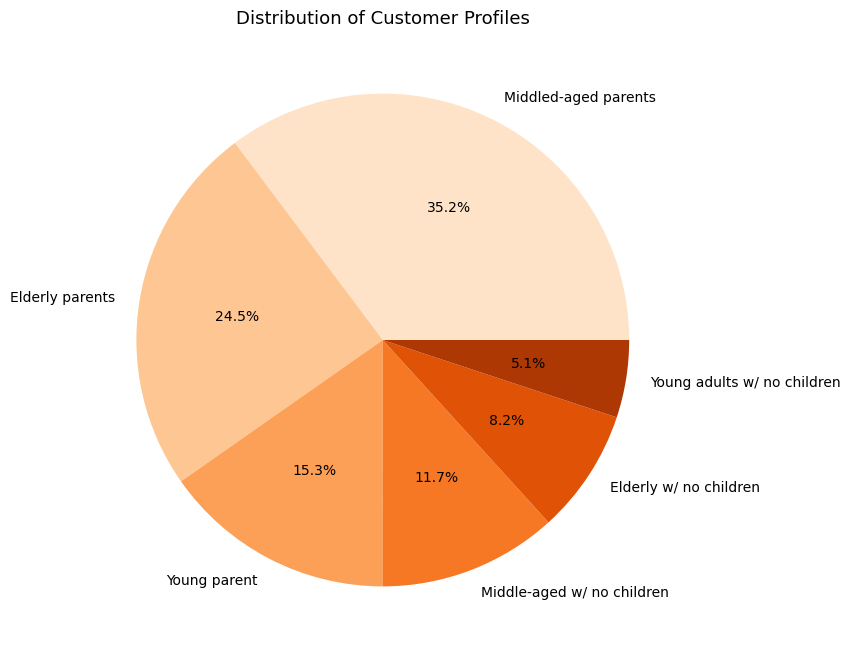

In [70]:
# Create a pie chart to visualize the distribution of customer profiles

pie_cust_prof = ords_prods_all['customer_profile'].value_counts().plot.pie(figsize = (8,8), 
                                                               colors = sns.color_palette('Oranges', 6), 
                                                              autopct = '%1.1f%%')
plt.ylabel('')
plt.title('Distribution of Customer Profiles', fontsize = 13)
plt.show()

In [71]:
# Export this chart

pie_cust_prof.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'dist_cust_profs.png'), bbox_inches = "tight")

# 12. Creating Aggregations

In [70]:
# Aggregating max, mean, and min of customer_profile by expenditure

ords_prods_all.groupby('customer_profile').agg({'prices': ['mean', 'min', 'max']})

prices           
                                 mean  min   max
customer_profile                                
Elderly parents              7.795131  1.0  25.0
Elderly w/ no children       7.799175  1.0  25.0
Middle-aged w/ no children   7.790248  1.0  25.0
Middled-aged parents         7.790868  1.0  25.0
Young adults w/ no children  7.772441  1.0  25.0
Young parent                 7.784377  1.0  25.0

In [72]:
# Aggregating max, mean, and min of customer_profile by usage frequency

ords_prods_all.groupby('customer_profile').agg({'days_since_prior_order': ['mean', 'min', 'max']})

days_since_prior_order           
                                              mean  min   max
customer_profile                                             
Elderly parents                          10.808885  0.0  30.0
Elderly w/ no children                   10.741025  0.0  30.0
Middle-aged w/ no children               10.760429  0.0  30.0
Middled-aged parents                     10.827522  0.0  30.0
Young adults w/ no children              10.946888  0.0  30.0
Young parent                             10.802853  0.0  30.0

# 13. Comparing Customer Profiles w/ Regions & Departments

In [72]:
# We want to compare customer profiles across each region. We will do so with 100% stacked charts.
# First, we create a normalized cross tab that we'll use for the data

cross_cust_region_1 = pd.crosstab(index=ords_prods_all['Region'],
                             columns=ords_prods_all['customer_profile'],
                             normalize="index")

In [73]:
# Next, we create a cross tab to display the data labels on the plot

cross_cust_region_labels = pd.crosstab(index=ords_prods_all['Region'],
                             columns=ords_prods_all['customer_profile'])

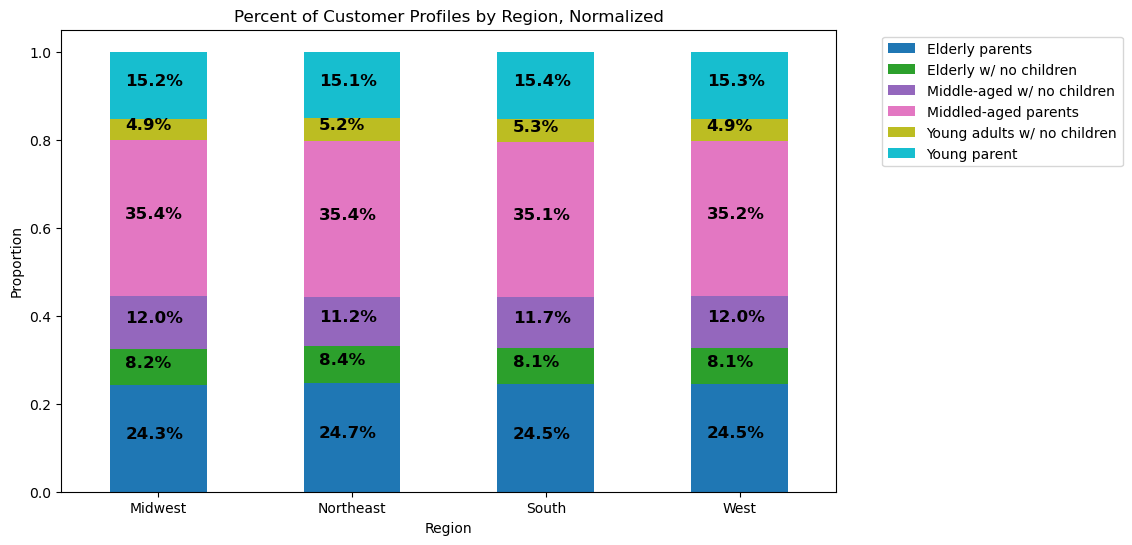

In [75]:
# Now, we create the stacked chart

cust_prof_region = cross_cust_region_1.plot(kind='bar', 
                        stacked=True, 
                        colormap='tab10', 
                        figsize=(10, 6))

plt.title('Percent of Customer Profiles by Region, Normalized')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.xlabel("Region")
plt.ylabel("Proportion")
plt.xticks(rotation = 0, fontsize=10)



for n, x in enumerate([*cross_cust_region_labels.index.values]):
    for (proportion, y_loc) in zip(cross_cust_region_1.loc[x],
                                   cross_cust_region_1.loc[x].cumsum()):
                
        plt.text(x=n - 0.17,
                 y=(y_loc - proportion) + (proportion / 2),
                 s=f'{np.round(proportion * 100, 1)}%', 
                 color="black",
                 fontsize=12,
                 fontweight="bold")

plt.show()

It is clear that middle-aged parents make up the majority of our demographics in all regions with elderly parents making up the second-most. With that being said, we see very similar percentages of customer profile across all regions. This shows us that no one region has more of any type of customer profile than the others.

In [76]:
# Export this chart

cust_prof_region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'cust_prof_region.png'), bbox_inches = "tight")

In [77]:
# We want to compare customer profiles across each department. We will do so with 100% stacked charts.
# First, we create a normalized cross tab that we'll use for the data

cross_cust_dept = pd.crosstab(index=ords_prods_all['department'],
                             columns=ords_prods_all['customer_profile'],
                             normalize="index")

In [78]:
# Next, we create a cross tab to display the data labels on the plot

cross_cust_dept_labels = pd.crosstab(index=ords_prods_all['department'],
                             columns=ords_prods_all['customer_profile'])

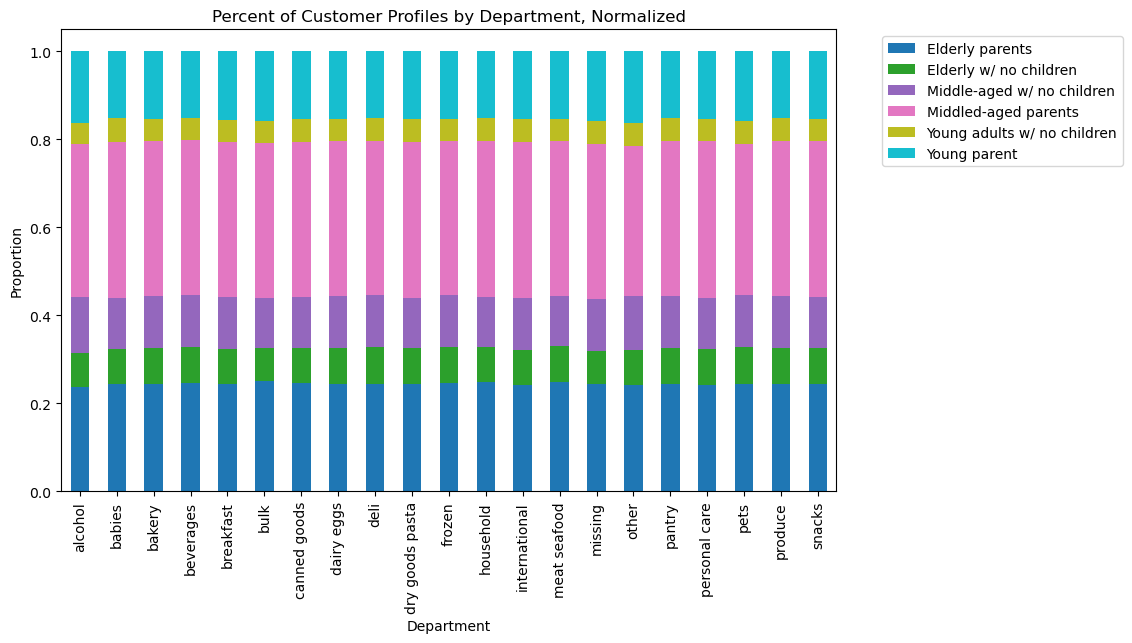

In [79]:
# Now, we create the stacked chart

cust_prof_dept = cross_cust_dept.plot(kind='bar', 
                        stacked=True, 
                        colormap='tab10', 
                        figsize=(10, 6))

plt.title('Percent of Customer Profiles by Department, Normalized')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.xlabel("Department")
plt.ylabel("Proportion")

plt.show()

Much like the customer profiles by region, we see a similar result when looking at customer profiles by department. Middle-aged parents make up the majority of shopper in all departments. Moreover, just like before, we see just about the same amount of customer profiles throughout all the deparments. No one department shows more of one type of customer profile than others.

In [80]:
# Export this chart

cust_prof_dept.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'cust_prof_dept.png'), bbox_inches = "tight")

In [82]:
# We want to compare customer profiles in terms of orders frequency.
# First, we create a normalized cross tab that we'll use for the data, and one for labels

cross_cust_prof_ord_freq = pd.crosstab(index=ords_prods_all['order_frequency_flag'],
                             columns=ords_prods_all['customer_profile'],
                             normalize="index")

cross_cust_prof_ord_freq_lab = pd.crosstab(index=ords_prods_all['order_frequency_flag'],
                             columns=ords_prods_all['customer_profile'])

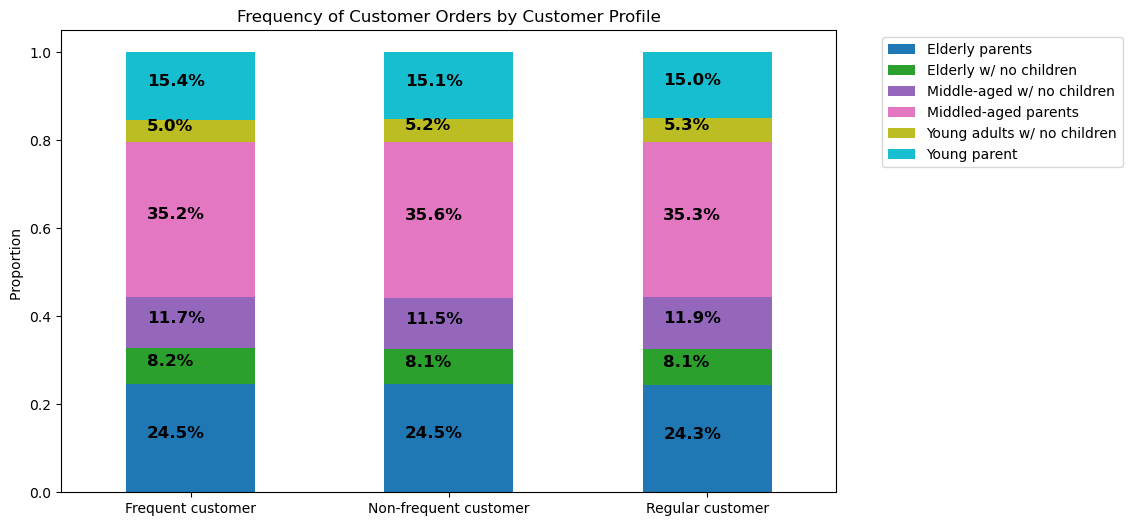

In [85]:
# Now, we create a stacked bar chart

pl_12 = cross_cust_prof_ord_freq.plot(kind='bar', 
                             stacked = True,
                            colormap='tab10', 
                            figsize=(10, 6))

plt.title('Frequency of Customer Orders by Customer Profile')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.xlabel("")
plt.ylabel("Proportion ")
plt.xticks(rotation = 0, fontsize=10)


for n, x in enumerate([*cross_cust_prof_ord_freq_lab.index.values]):
    for (proportion, y_loc) in zip(cross_cust_prof_ord_freq.loc[x],
                                   cross_cust_prof_ord_freq.loc[x].cumsum()):
                
        plt.text(x=n - 0.17,
                 y=(y_loc - proportion) + (proportion / 2),
                 s=f'{np.round(proportion * 100, 1)}%', 
                 color="black",
                 fontsize=12,
                 fontweight="bold")


plt.show()

In [86]:
# Export this chart

pl_12.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'cust_prof_ord_freq.png'), bbox_inches = "tight")

In [13]:
# compare the customer profiles per department

cross_cust_dept_2 = pd.crosstab(index=ords_prods_all['department'],
                             columns=ords_prods_all['customer_profile'])

Text(0, 0.5, '')

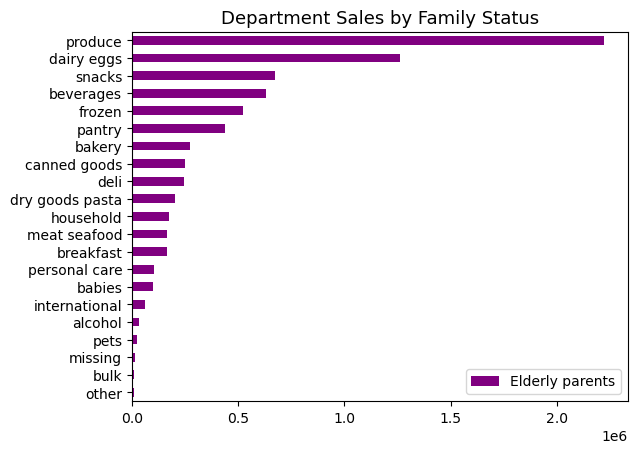

In [31]:
# Bar chart for department sales from elderly parents

bar_elderly_par = cross_cust_dept_2.sort_values(['Elderly parents']).plot.barh(y='Elderly parents', 
                                                                             color="Purple").legend(loc='lower right')
plt.title('Department Sales by Family Status',fontsize=13)
plt.xlabel('')
plt.ylabel('')

In [42]:
# Export this chart

bar_elderly_par.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_elderly_kids.png'), bbox_inches = "tight")

Text(0, 0.5, '')

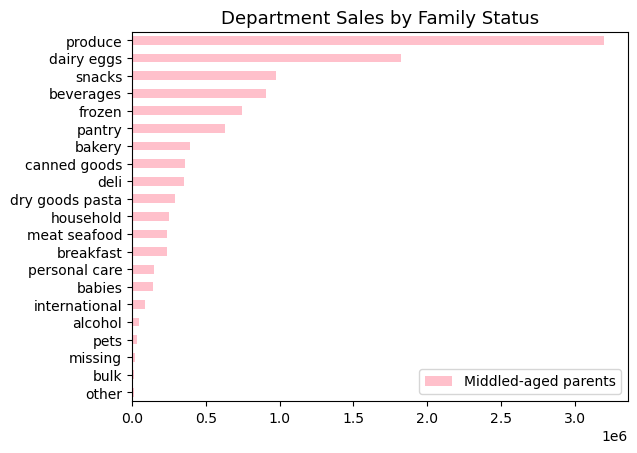

In [32]:
# Bar chart for department sales from middle-aged parents

bar_mid_par = cross_cust_dept_2.sort_values(['Middled-aged parents']).plot.barh(y='Middled-aged parents', 
                                                                             color="Pink").legend(loc='lower right')
plt.title('Department Sales by Family Status',fontsize=13)
plt.xlabel('')
plt.ylabel('')

In [41]:
# Export this chart

bar_mid_par.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_middle_kids.png'), bbox_inches = "tight")

Text(0, 0.5, '')

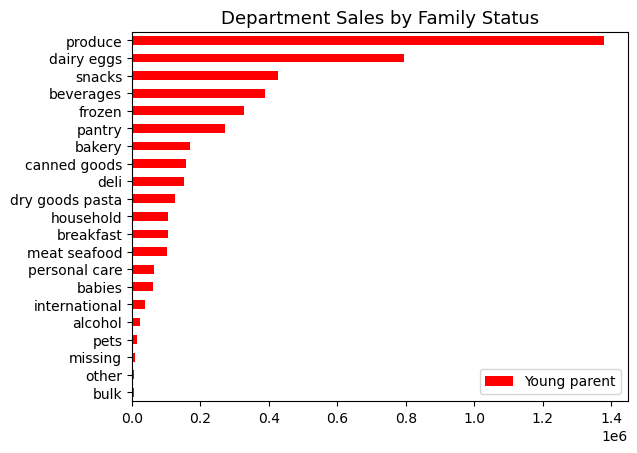

In [24]:
# Bar chart for department sales from young parents

bar_young_par = cross_cust_dept_2.sort_values(['Young parent']).plot.barh(y='Young parent', 
                                                                             color="Red").legend(loc='lower right')
plt.title('Department Sales by Family Status',fontsize=13)
plt.xlabel('')
plt.ylabel('')

In [40]:
# Export this chart

bar_young_par.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_young_kids.png'), bbox_inches = "tight")

Text(0, 0.5, '')

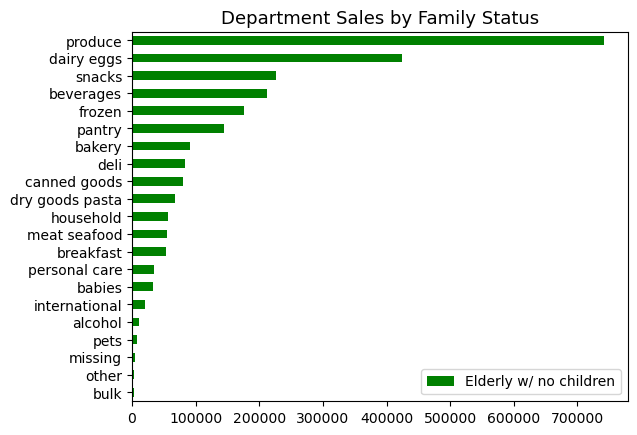

In [30]:
# Bar chart for department sales from elderly with no child

bar_elder_no = cross_cust_dept_2.sort_values(['Elderly w/ no children']).plot.barh(y='Elderly w/ no children', 
                                                                             color="Green").legend(loc='lower right')
plt.title('Department Sales by Family Status',fontsize=13)
plt.xlabel('')
plt.ylabel('')

In [39]:
# Export this chart

bar_elder_no.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_elder_no_kids.png'), bbox_inches = "tight")

Text(0, 0.5, '')

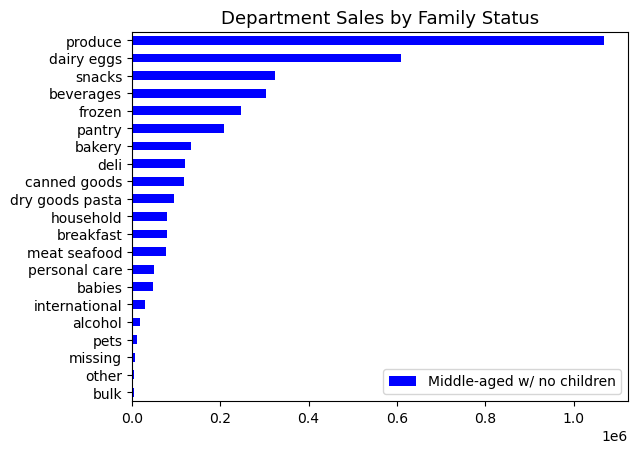

In [34]:
# Bar chart for department sales from middle-aged no children

bar_middle_no = cross_cust_dept_2.sort_values(['Middle-aged w/ no children']).plot.barh(y='Middle-aged w/ no children', 
                                                                             color="Blue").legend(loc='lower right')
plt.title('Department Sales by Family Status',fontsize=13)
plt.xlabel('')
plt.ylabel('')

In [38]:
# Export this chart

bar_middle_no.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_middle_no_kids.png'), bbox_inches = "tight")

Text(0, 0.5, '')

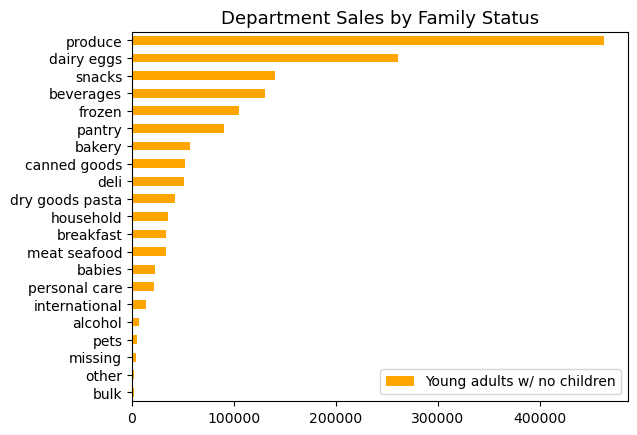

In [36]:
# Bar chart for department sales from young adults with no children

bar_young_no = cross_cust_dept_2.sort_values(['Young adults w/ no children']).plot.barh(y='Young adults w/ no children', 
                                                                             color="Orange").legend(loc='lower right')
plt.title('Department Sales by Family Status',fontsize=13)
plt.xlabel('')
plt.ylabel('')

In [37]:
# Export this chart

bar_young_no.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_young_no_kids.png'), bbox_inches = "tight")

# 14. Extra Visualizations

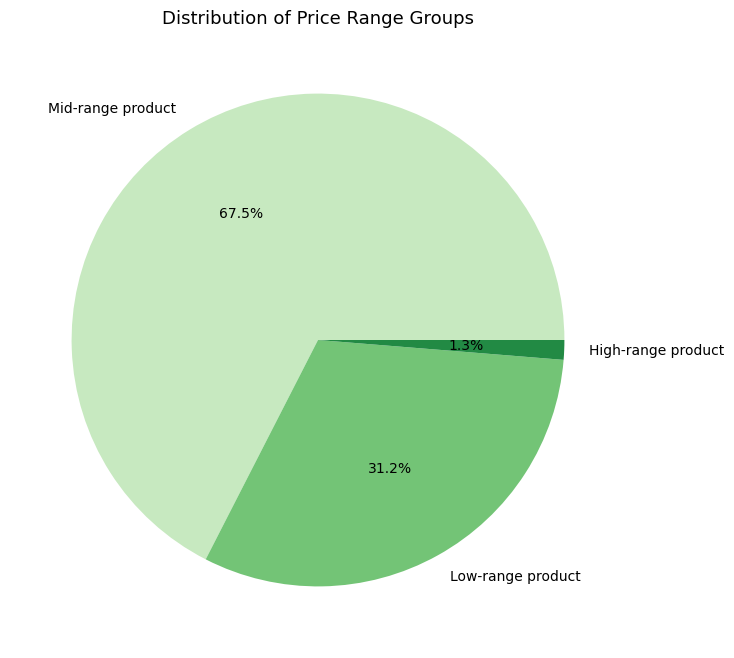

In [5]:
# Create a pie chart to visualize the distribution of price range groupings

pie_price_range = ords_prods_all['price_range_loc'].value_counts().plot.pie(figsize = (8,8), 
                                                               colors = sns.color_palette('Greens', 3), 
                                                              autopct = '%1.1f%%')
plt.ylabel('')
plt.title('Distribution of Price Range Groups', fontsize = 13)
plt.show()

In [8]:
# Export this pie chart

pie_price_range.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'price_range_pie.png'), bbox_inches = "tight")

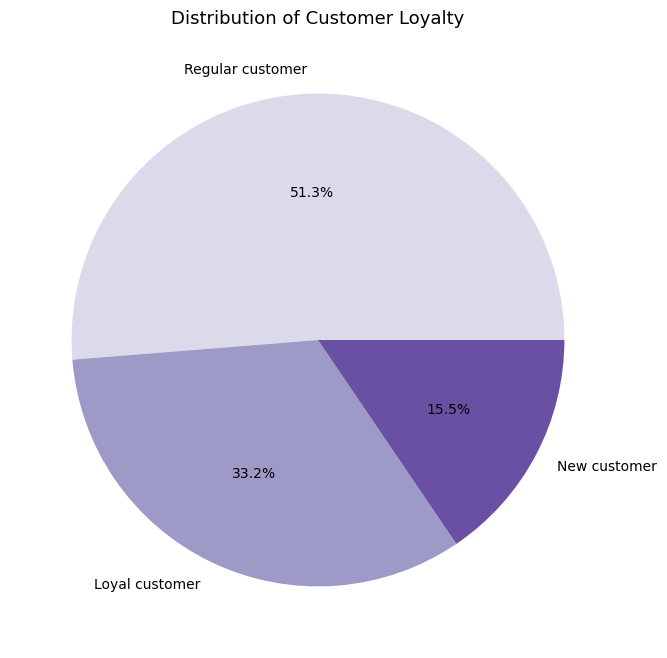

In [9]:
# Create a pie chart to visualize the distribution of customer loyalty

pie_cust_loyal = ords_prods_all['loyalty_flag'].value_counts().plot.pie(figsize = (8,8), 
                                                               colors = sns.color_palette('Purples', 3), 
                                                              autopct = '%1.1f%%')
plt.ylabel('')
plt.title('Distribution of Customer Loyalty', fontsize = 13)
plt.show()

In [10]:
# Export this pie chart

pie_cust_loyal.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'customer_loyalty_pie.png'), bbox_inches = "tight")

Text(0.5, 0, 'Amount of Items Ordered (in millions)')

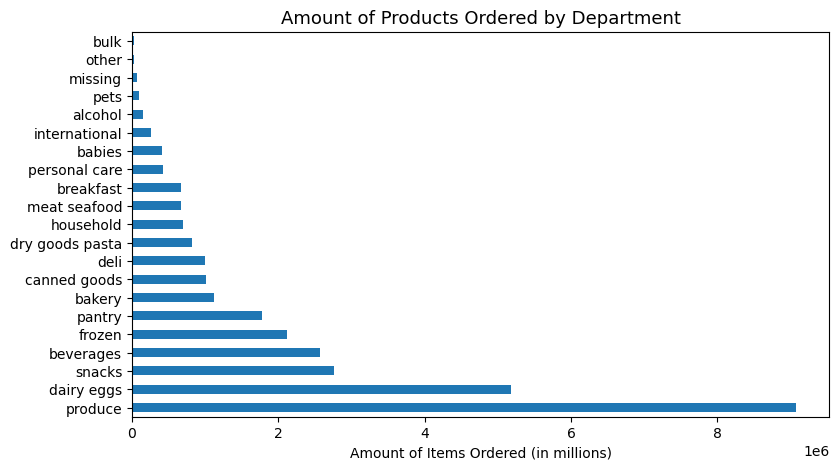

In [49]:
# Create a bar chart of the frequency of departments orders

dept_bar = ords_prods_all['department'].value_counts().plot.barh(figsize = (9,5))
plt.title('Amount of Products Ordered by Department', fontsize = 13)
plt.xlabel('Amount of Items Ordered (in millions)', fontsize = 10)

In [21]:
# Export this bar chart

dept_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'orders_by_dept.png'), bbox_inches = "tight")

# 15. Ordering Habits Based On Customer Loyalty

In [47]:
# We want to compare customer loyalty in terms of orders by day of the week.
# We create a cross tab that we'll use for the data

cross_loyalty_dow = pd.crosstab(index=ords_prods_all['orders_day_of_week'],
                             columns=ords_prods_all['loyalty_flag'])

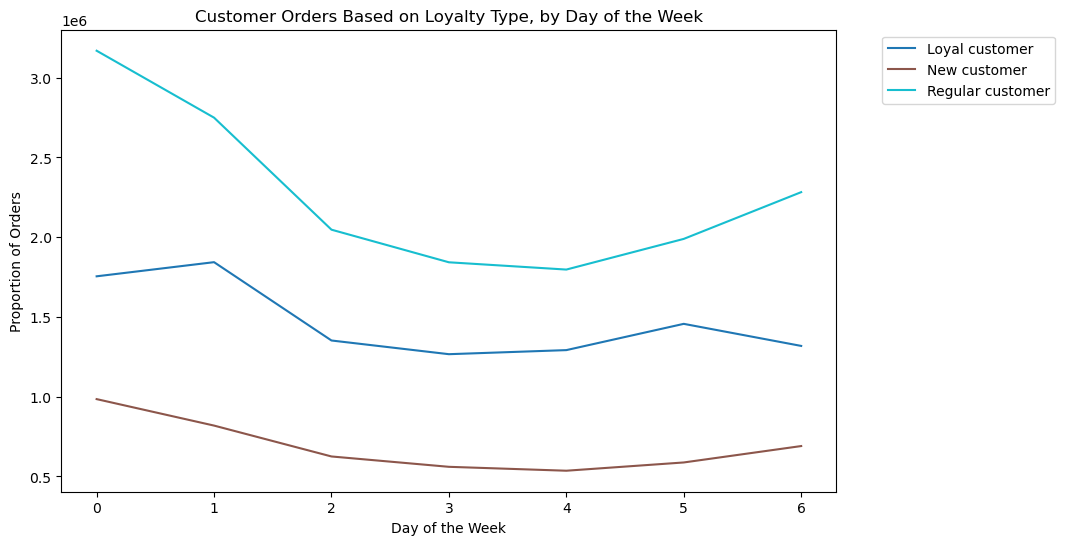

In [48]:
# Now, we create a line chart

pl_1 = cross_loyalty_dow.plot(kind='line', 
                        colormap='tab10', 
                        figsize=(10, 6))

plt.title('Customer Orders Based on Loyalty Type, by Day of the Week')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.xlabel("Day of the Week")
plt.ylabel("Proportion of Orders")

plt.show()

In [66]:
# Export this chart

pl_1.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'dow_loyalty.png'), bbox_inches = "tight")

In [45]:
# We want to compare customer loyalty in terms of orders by hour of the day.
# First, we create a cross tab that we'll use for the data

cross_loyalty_hour = pd.crosstab(index=ords_prods_all['order_hour_of_day'],
                             columns=ords_prods_all['loyalty_flag'])

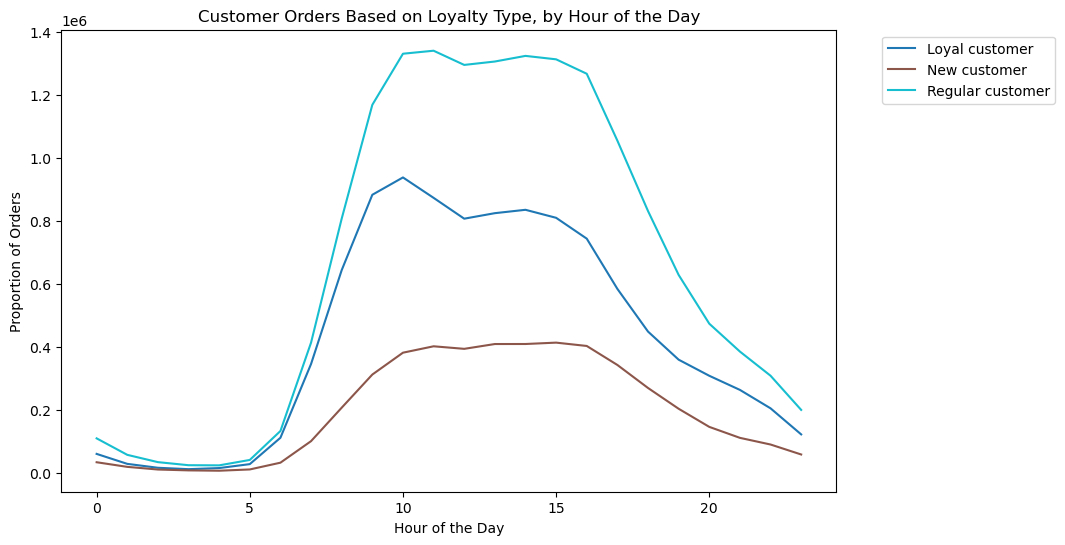

In [46]:
# Now, we create a line chart

pl_2 = cross_loyalty_hour.plot(kind='line', 
                        colormap='tab10', 
                        figsize=(10, 6))

plt.title('Customer Orders Based on Loyalty Type, by Hour of the Day')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.xlabel("Hour of the Day")
plt.ylabel("Proportion of Orders")

plt.show()

In [69]:
# Export this chart

pl_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hourly_loyalty.png'), bbox_inches = "tight")

In [35]:
# We want to compare customer loyalty in terms of orders frequency.
# First, we create a cross tab that we'll use for the data

cross_loyalty_ord_freq = pd.crosstab(index=ords_prods_all['loyalty_flag'],
                             columns=ords_prods_all['order_frequency_flag'])

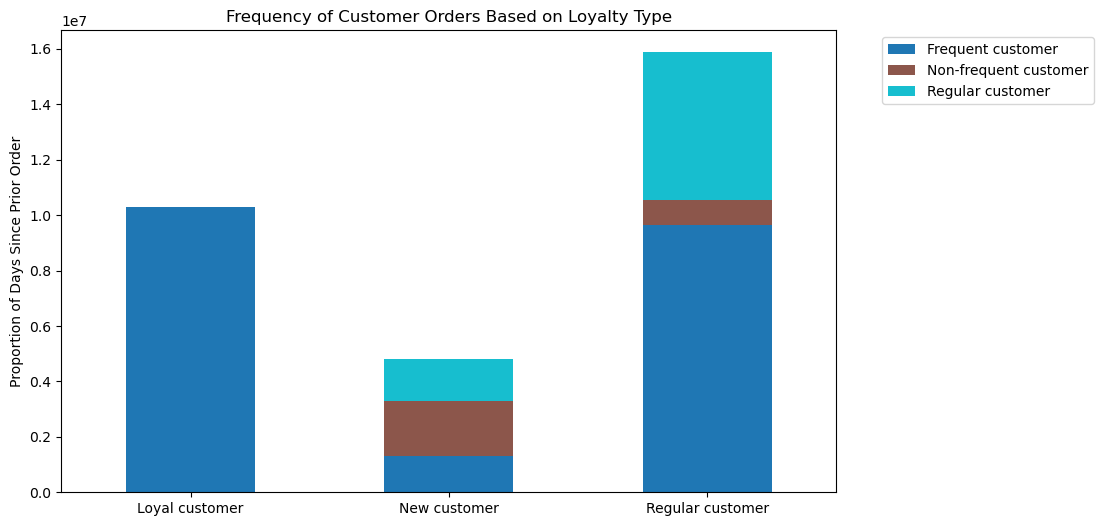

In [43]:
# Now, we create a stacked bar chart

pl_3 = cross_loyalty_ord_freq.plot(kind='bar', 
                            stacked=True, 
                            colormap='tab10', 
                            figsize=(10, 6))

plt.title('Frequency of Customer Orders Based on Loyalty Type')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.xlabel("")
plt.ylabel("Proportion of Days Since Prior Order")
plt.xticks(rotation = 0, fontsize=10)


plt.show()

In [71]:
# Export this chart

pl_3.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'freq_loyalty.png'), bbox_inches = "tight")

# 16. Ordering Habits Based On Customer Region

In [22]:
# We want to compare customer loyalty in terms of orders by day of the week.
# We create a cross tab that we'll use for the data

cross_region_dow = pd.crosstab(index=ords_prods_all['orders_day_of_week'],
                             columns=ords_prods_all['Region'])

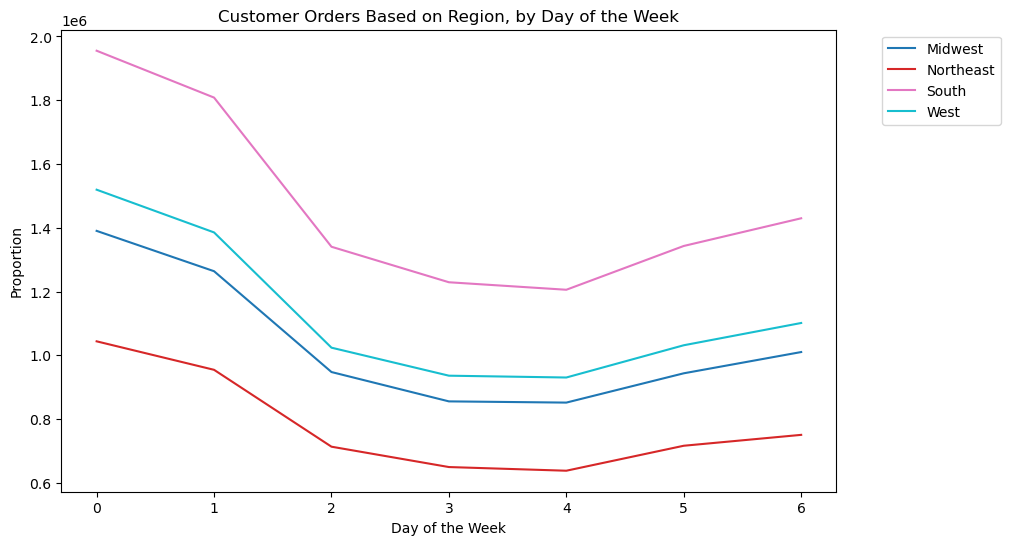

In [23]:
# Now, we create a line chart

pl_4 = cross_region_dow.plot(kind='line', 
                        colormap='tab10', 
                        figsize=(10, 6))

plt.title('Customer Orders Based on Region, by Day of the Week')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.xlabel("Day of the Week")
plt.ylabel("Proportion")

plt.show()

In [24]:
# Export this chart

pl_4.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'dow_ord_region.png'), bbox_inches = "tight")

In [91]:
cross_region_dow_1 = pd.crosstab(index=ords_prods_all['orders_day_of_week'],
                             columns=ords_prods_all['Region'],
                             normalize="index")

cross_region_dow_1_label = pd.crosstab(index=ords_prods_all['orders_day_of_week'],
                             columns=ords_prods_all['Region'])

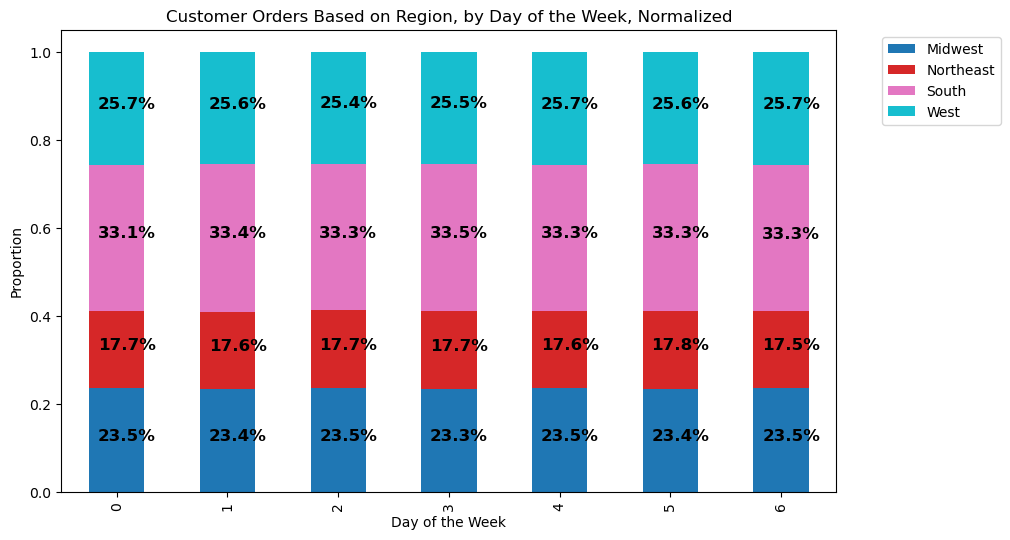

In [102]:
# Now, we create a line chart

pl_5 = cross_region_dow_1.plot(kind='bar', 
                             stacked = True,
                            colormap='tab10', 
                            figsize=(10, 6))

plt.title('Customer Orders Based on Region, by Day of the Week, Normalized')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.xlabel("Day of the Week")
plt.ylabel("Proportion")

for n, x in enumerate([*cross_region_dow_1_label.index.values]):
    for (proportion, y_loc) in zip(cross_region_dow_1.loc[x],
                                   cross_region_dow_1.loc[x].cumsum()):
                
        plt.text(x=n - 0.17,
                 y=(y_loc - proportion) + (proportion / 2),
                 s=f'{np.round(proportion * 100, 1)}%', 
                 color="black",
                 fontsize=12,
                 fontweight="bold")

plt.show()

In [25]:
# We want to compare customer loyalty in terms of orders by hour of the day.
# We create a cross tab that we'll use for the data

cross_region_hour = pd.crosstab(index=ords_prods_all['order_hour_of_day'],
                             columns=ords_prods_all['Region'])

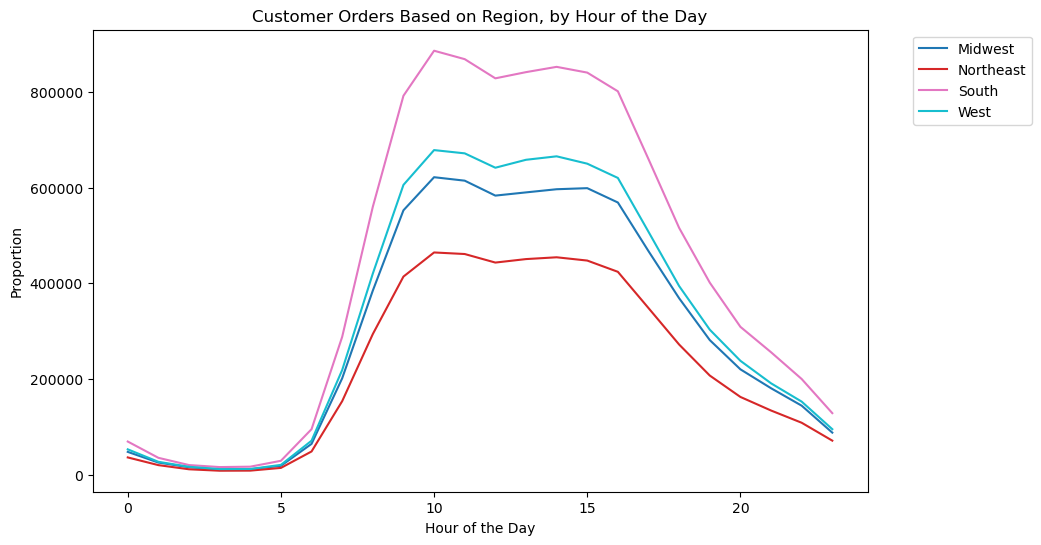

In [26]:
# Now, we create a line chart

pl_6 = cross_region_hour.plot(kind='line', 
                        colormap='tab10', 
                        figsize=(10, 6))

plt.title('Customer Orders Based on Region, by Hour of the Day')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.xlabel("Hour of the Day")
plt.ylabel("Proportion")

plt.show()

In [27]:
# Export this chart

pl_6.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hour_ord_region.png'), bbox_inches = "tight")

In [6]:
# We want to compare customer loyalty in terms of orders by hour of the day.
# We create a cross tab that we'll use for the data

cross_region_hour_1 = pd.crosstab(index=ords_prods_all['order_hour_of_day'],
                             columns=ords_prods_all['Region'],
                             normalize="index")

cross_region_hour_lab = pd.crosstab(index=ords_prods_all['order_hour_of_day'],
                             columns=ords_prods_all['Region'])

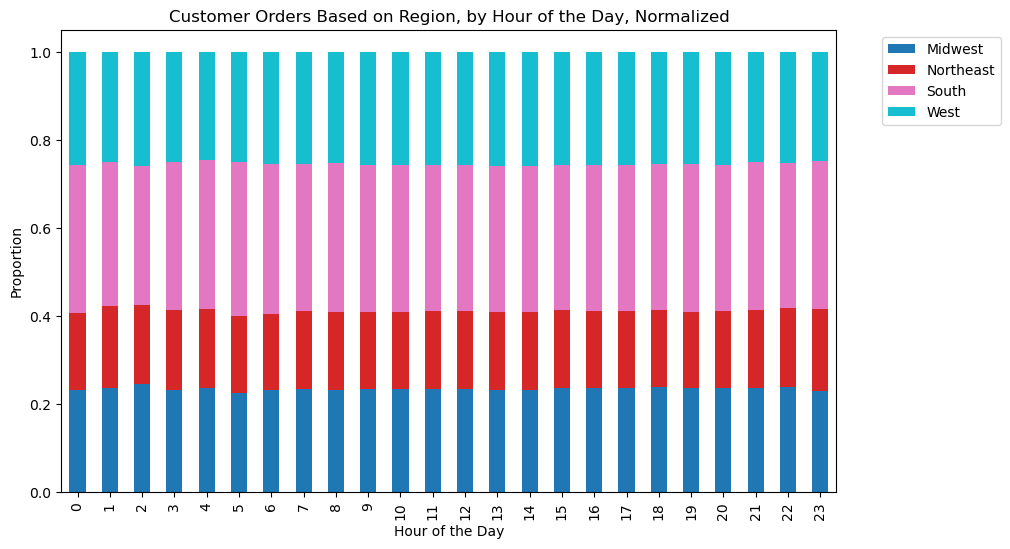

In [10]:
# Now, we create a line chart

pl_7 = cross_region_hour_1.plot(kind='bar', 
                             stacked = True,
                            colormap='tab10', 
                            figsize=(10, 6))

plt.title('Customer Orders Based on Region, by Hour of the Day, Normalized')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.xlabel("Hour of the Day")
plt.ylabel("Proportion")

plt.show()

In [28]:
# We want to compare Regions in terms of orders frequency.
# First, we create a normalized cross tab that we'll use for the data, and one for labels

cross_region_ord_freq = pd.crosstab(index=ords_prods_all['order_frequency_flag'],
                             columns=ords_prods_all['Region'],
                             normalize="index")

cross_region_ord_freq_lab = pd.crosstab(index=ords_prods_all['order_frequency_flag'],
                             columns=ords_prods_all['Region'])

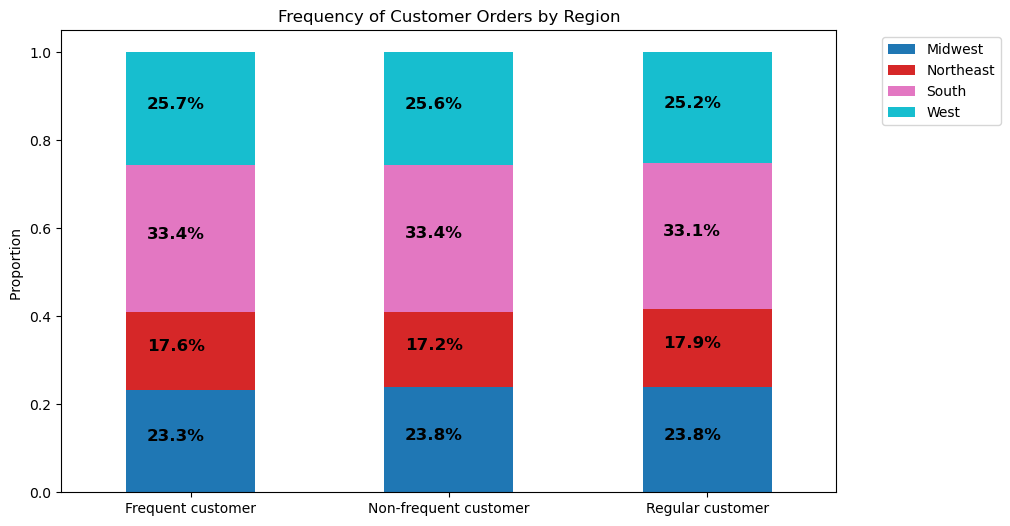

In [50]:
# Now, we create a stacked bar chart

pl_8 = cross_region_ord_freq.plot(kind='bar', 
                             stacked = True,
                            colormap='tab10', 
                            figsize=(10, 6))

plt.title('Frequency of Customer Orders by Region')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.xlabel("")
plt.ylabel("Proportion ")
plt.xticks(rotation = 0, fontsize=10)


for n, x in enumerate([*cross_region_ord_freq_lab.index.values]):
    for (proportion, y_loc) in zip(cross_region_ord_freq.loc[x],
                                   cross_region_ord_freq.loc[x].cumsum()):
                
        plt.text(x=n - 0.17,
                 y=(y_loc - proportion) + (proportion / 2),
                 s=f'{np.round(proportion * 100, 1)}%', 
                 color="black",
                 fontsize=12,
                 fontweight="bold")


plt.show()

In [30]:
# Export this chart

pl_8.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'ord_freq_region.png'), bbox_inches = "tight")

In [11]:
# We want to compare department sales by region.
# First, we create a normalized cross tab that we'll use for the data, and one for labels

cross_region_dept = pd.crosstab(index=ords_prods_all['department'],
                             columns=ords_prods_all['Region'],
                             normalize="index")

cross_region_dept_lab = pd.crosstab(index=ords_prods_all['department'],
                             columns=ords_prods_all['Region'])

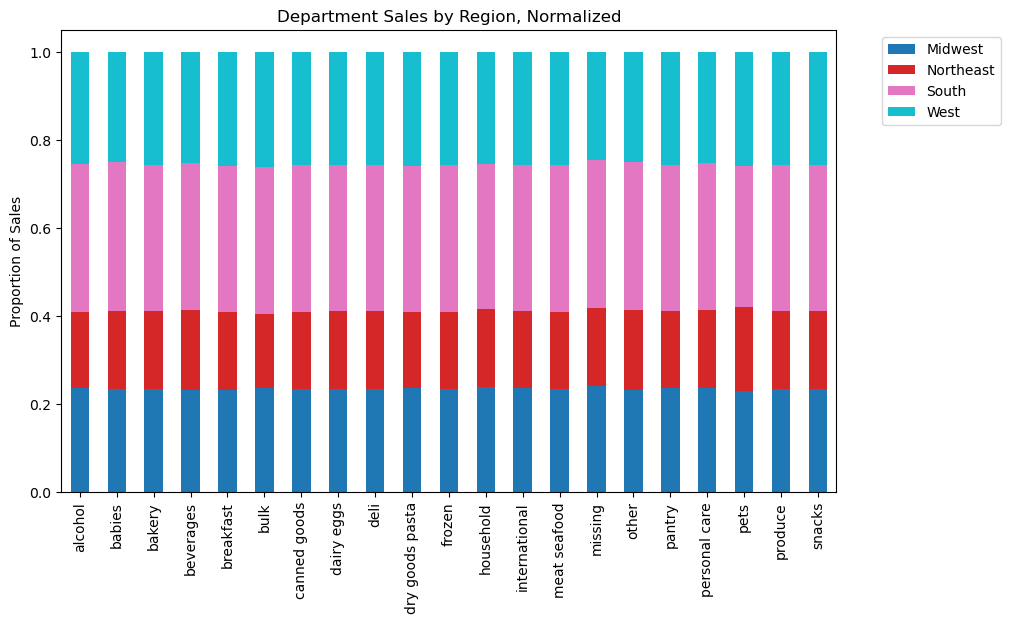

In [52]:
# Now, we create a stacked bar chart

pl_9 = cross_region_dept.plot(kind='bar', 
                             stacked = True,
                            colormap='tab10', 
                            figsize=(10, 6))

plt.title('Department Sales by Region, Normalized')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.xlabel("")
plt.ylabel("Proportion of Sales")

plt.show()

In [31]:
# Export this chart

pl_9.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'depart_region.png'), bbox_inches = "tight")

# 17. Ordering Habits Based On Age & Family Status

In [56]:
# We want to compare department sales by age group.
# First, we create a normalized cross tab that we'll use for the data

cross_age_group_dept = pd.crosstab(index=ords_prods_all['department'],
                             columns=ords_prods_all['age_group'],
                             normalize="index")

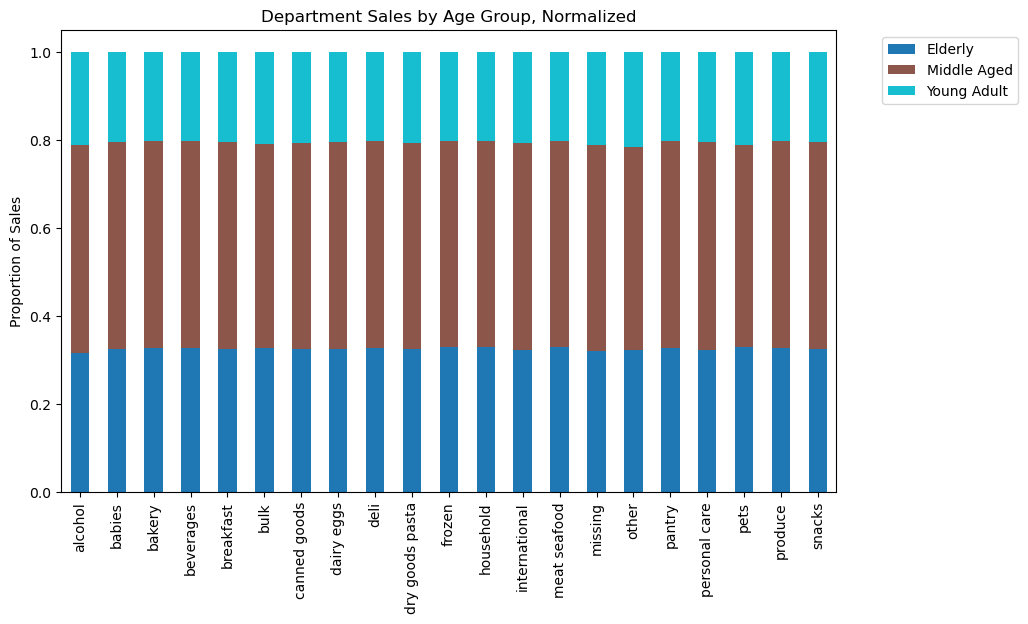

In [58]:
# Now, we create a stacked bar chart

pl_10 = cross_age_group_dept.plot(kind='bar', 
                             stacked = True,
                            colormap='tab10', 
                            figsize=(10, 6))

plt.title('Department Sales by Age Group, Normalized')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.xlabel("")
plt.ylabel("Proportion of Sales")

plt.show()

In [59]:
# Export this chart

pl_10.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'dept_age_group.png'), bbox_inches = "tight")

In [60]:
# We want to compare department sales by family status.
# First, we create a normalized cross tab that we'll use for the data

cross_fam_stat_dept = pd.crosstab(index=ords_prods_all['department'],
                             columns=ords_prods_all['fam_status'],
                             normalize="index")

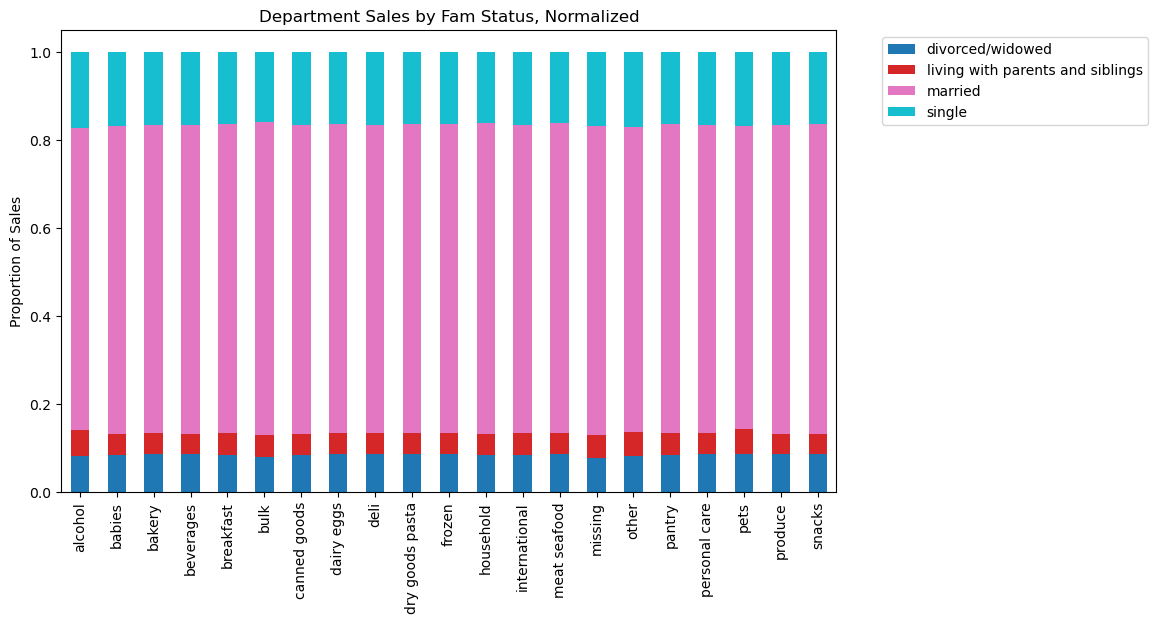

In [61]:
# Now, we create a stacked bar chart

pl_11 = cross_fam_stat_dept.plot(kind='bar', 
                             stacked = True,
                            colormap='tab10', 
                            figsize=(10, 6))

plt.title('Department Sales by Fam Status, Normalized')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.xlabel("")
plt.ylabel("Proportion of Sales")

plt.show()

In [62]:
# Export this chart

pl_11.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'dept_fam_status.png'), bbox_inches = "tight")

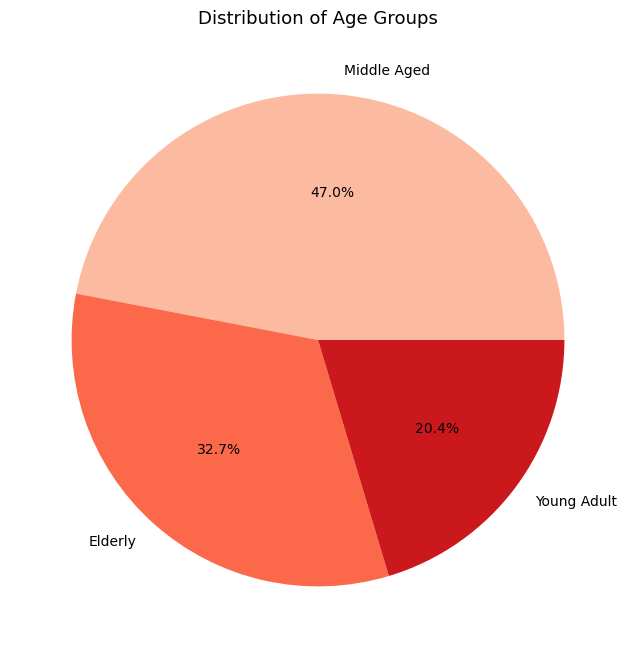

In [66]:
# Create a pie chart to visualize the distribution of age groups

pie_age_group = ords_prods_all['age_group'].value_counts().plot.pie(figsize = (8,8), 
                                                               colors = sns.color_palette('Reds', 3), 
                                                              autopct = '%1.1f%%')
plt.ylabel('')
plt.title('Distribution of Age Groups', fontsize = 13)
plt.show()

In [67]:
# Export this chart

pie_age_group.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'dist_age_group.png'), bbox_inches = "tight")

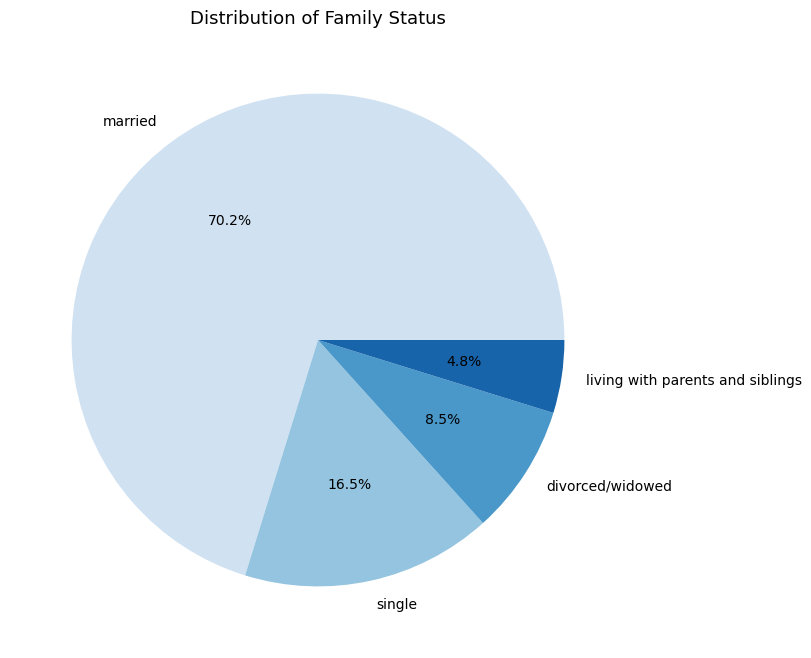

In [49]:
# Create a pie chart to visualize the distribution of family status

pie_fam_status = ords_prods_all['fam_status'].value_counts().plot.pie(figsize = (8,8), 
                                                               colors = sns.color_palette('Blues', 4), 
                                                              autopct = '%1.1f%%')
plt.ylabel('')
plt.title('Distribution of Family Status', fontsize = 13)
plt.show()

In [50]:
# Export this chart

pie_fam_status.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'dist_fam_status.png'), bbox_inches = "tight")

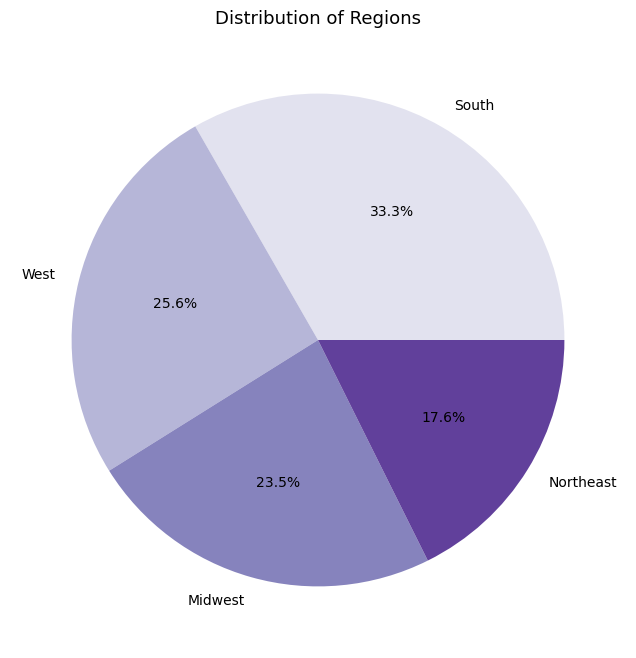

In [47]:
# Create a pie chart to visualize the distribution of regions

pie_region = ords_prods_all['Region'].value_counts().plot.pie(figsize = (8,8), 
                                                               colors = sns.color_palette('Purples', 4), 
                                                              autopct = '%1.1f%%')
plt.ylabel('')
plt.title('Distribution of Regions', fontsize = 13)
plt.show()

In [48]:
# Export this chart

pie_region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'dist_region.png'), bbox_inches = "tight")

In [43]:
# Export the final dataframe

ords_prods_all.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'orders_products_all_final.pkl'))